In [2]:
import os
import wandb
import numpy as np
import mplhep as hep
import wandb

hep.style.use("CMS")
import matplotlib

matplotlib.rc('font', size=13)

import os

os.environ.get("LD_LIBRARY_PATH")
# %%
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import numpy as np
import torch
import argparse


In [3]:
path = "/eos/user/g/gkrzmanc/2024/results_karolina_7_4_/results"

In [4]:
def read_pkl_files(exp_name):
    _path = os.path.join(path, exp_name, "intermediate_plots")
    files = os.listdir(_path)
    files = [f for f in files if "pkl" in f]
    return files, _path

def get_steps_and_pids(pkl_files):
    result = {}
    for f in pkl_files:
        if f.startswith("plots_"):
            spl = f.split("_")
            step = int(spl[2])
            pid = int(spl[4].split(".")[0])
            if pid not in result:
                result[pid] = {}
            if step not in result[pid]:
                result[pid][step] = f
    return result

pid_loss_files, pid_loss_path = read_pkl_files('log_eval_neutral_PID_loss_With_Detailed_Plot_Logging')
nopid_files, nopid_path = read_pkl_files('log_eval_neutral_no_PID_loss')

steps_pids = get_steps_and_pids(pid_loss_files)
steps_pids_no_pid_loss = get_steps_and_pids(nopid_files)
common_step = max(filter(lambda x: x in steps_pids[130], steps_pids_no_pid_loss[130]))
common_step

220000

In [5]:
#steps_pids.keys()
upper, lower = pickle.load(open(os.path.join(pid_loss_path, steps_pids[130][220000]), "rb"))

In [6]:
upper["ML"]

array([0.27003921, 0.11412742, 0.09707605, 0.07164274, 0.06982338,
       0.07422575, 0.06212362,        nan])

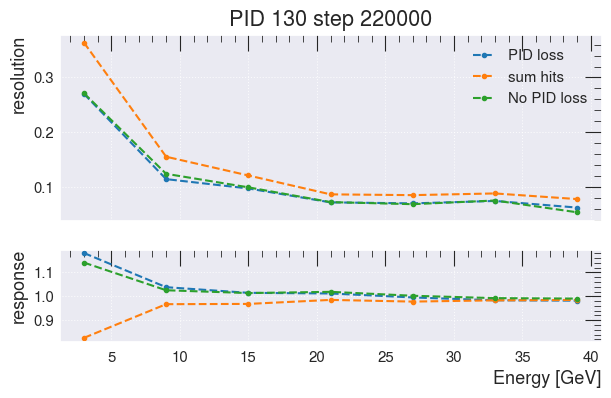

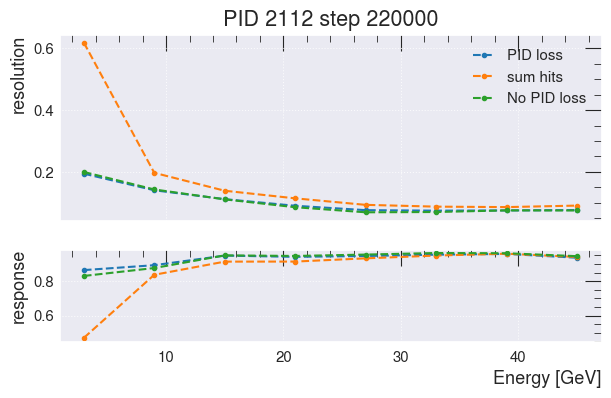

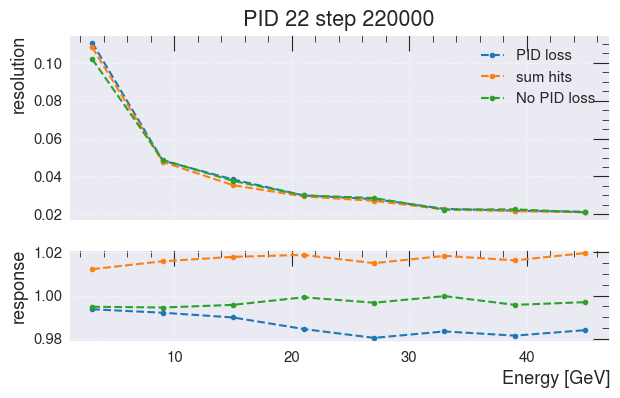

In [7]:


def get_plots(ax, upper, lower, title="", label="model", include_sum_hits=True, include_track_p=True):
    e_thresholds = [0, 6, 12, 18, 24, 30, 36, 42, 48]  # True E thresholds
    # x_bins set just to the middles of the bins
    bins_x = [(e_thresholds[i] + e_thresholds[i+1]) / 2 for i in range(len(e_thresholds) - 1)]
    
    ax[0].plot(bins_x, upper["ML"], ".--", label=label)
    ax[1].plot(bins_x, lower["ML"], ".--", label=label)
    if include_track_p:
        ax[0].plot(bins_x, upper["p"], ".--", label="track p")
        ax[1].plot(bins_x, lower["p"], ".--", label="track p")
    if include_sum_hits:
        ax[0].plot(bins_x,  upper["sum"], ".--", label="sum hits")
        ax[1].plot(bins_x, lower["sum"], ".--", label="sum hits")
    ax[0].legend()
    ax[1].set_xlabel("Energy [GeV]")
    ax[0].set_ylabel("resolution")
    #ax[1].set_ylim([0.8, 1.15])
    ax[1].set_ylabel("response")
    ax[0].set_title(title)
    # turn on grid
    


for key in steps_pids:
    fig, ax = plt.subplots(2, 1, figsize=(7, 4), sharex=True,
                           gridspec_kw={'height_ratios': [2, 1]})  # Height of 2 subplots
    common_step = max(filter(lambda x: x in steps_pids[key], steps_pids_no_pid_loss[key]))
    upper, lower =  pickle.load(open(os.path.join(pid_loss_path, steps_pids[key][common_step]), "rb"))
    get_plots(ax, upper, lower, title="PID " + str(key) + " step " + str(common_step), label="PID loss", include_sum_hits=True, include_track_p=False)
    upper, lower = pickle.load(open(os.path.join(nopid_path, steps_pids_no_pid_loss[key][common_step]), "rb"))
    get_plots(ax, upper, lower, title="PID " + str(key) + " step " + str(common_step), label="No PID loss", include_sum_hits=False, include_track_p=False)
    ax[0].grid(True)
    ax[1].grid(True)
    fig.show()
    

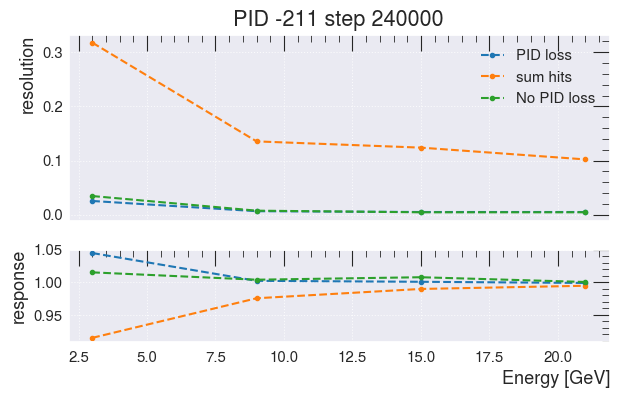

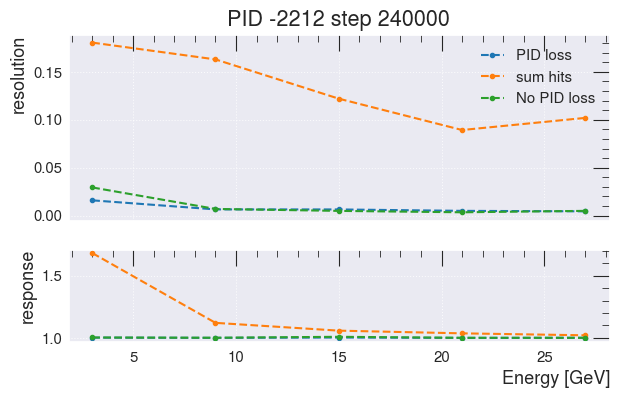

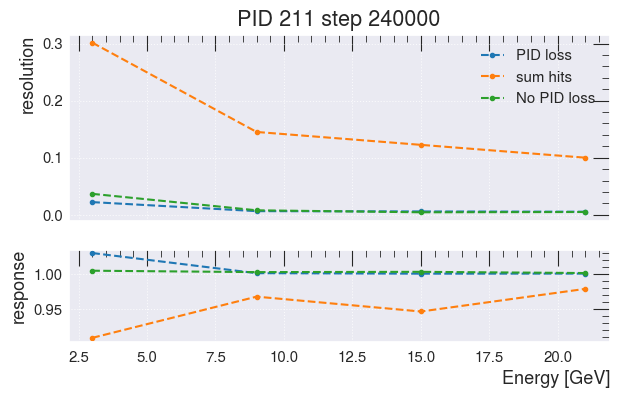

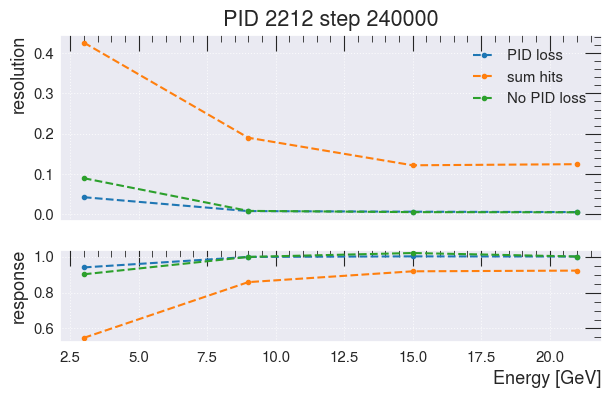

In [8]:

pid_loss_files, pid_loss_path = read_pkl_files('log_eval_charged_PID_loss')
nopid_files, nopid_path = read_pkl_files('log_eval_charged_no_PID_loss')

steps_pids = get_steps_and_pids(pid_loss_files)
steps_pids_no_pid_loss = get_steps_and_pids(nopid_files)
for key in steps_pids:
    fig, ax = plt.subplots(2, 1, figsize=(7, 4), sharex=True,
                           gridspec_kw={'height_ratios': [2, 1]})  # Height of 2 subplots
    common_step = max(filter(lambda x: x in steps_pids[key], steps_pids_no_pid_loss[key]))
    upper, lower =  pickle.load(open(os.path.join(pid_loss_path, steps_pids[key][common_step]), "rb"))
    get_plots(ax, upper, lower, title="PID " + str(key) + " step " + str(common_step), label="PID loss", include_sum_hits=True, include_track_p=False)
    upper, lower = pickle.load(open(os.path.join(nopid_path, steps_pids_no_pid_loss[key][common_step]), "rb"))
    get_plots(ax, upper, lower, title="PID " + str(key) + " step " + str(common_step), label="No PID loss", include_sum_hits=False, include_track_p=False)
    ax[0].grid(True)
    ax[1].grid(True)
    fig.show()